1542


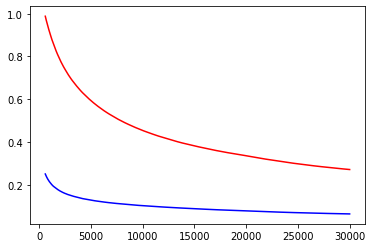

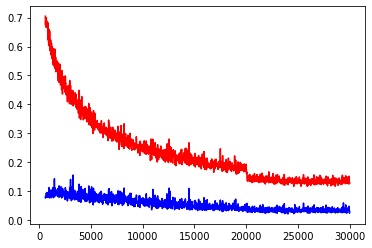

6576


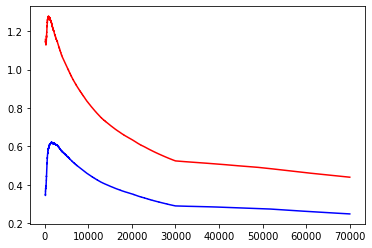

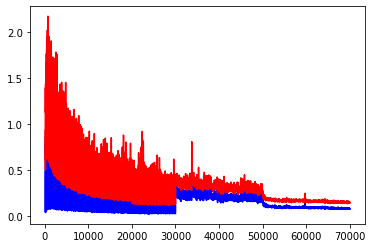

3500


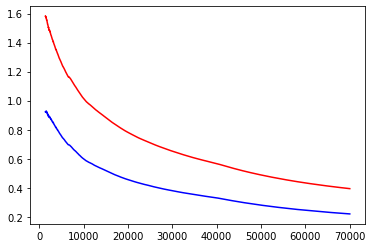

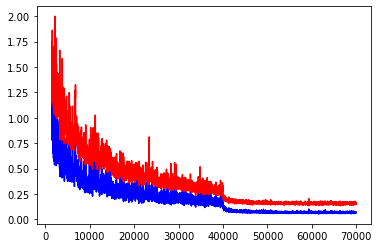

In [2]:
import json
import numpy as np
from matplotlib import pyplot as plt

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines


def plot_loss(file):
    losses = []
    iters = []
    total_losses = []
    experiment_metrics = load_json_arr(file)
    for line in experiment_metrics:
        if 'loss_base_reg' in line:
            total_losses.append(line['total_loss'])
            losses.append(line['loss_base_reg'])
            iters.append(line['iteration'])
            # print(line['loss_base_reg'])

    total_losses = np.array(total_losses)
    losses = np.array(losses)
    iters = np.array(iters)
    print(len(iters))
    order = np.argsort(iters)
    losses = losses[order]
    total_losses = total_losses[order]
    iters = iters[order]

    losses_mean = np.cumsum(losses)
    losses_mean = losses_mean / np.array(range(1, len(losses_mean)+1))
    total_losses_mean = np.cumsum(total_losses)
    total_losses_mean = total_losses_mean / np.array(range(1, len(total_losses_mean)+1))

    # plt.plot(iters[-2227:], losses[-2227:])
    plt.plot(iters[70:], losses_mean[70:], c='b')
    plt.plot(iters[70:], total_losses_mean[70:], c='r')
    plt.show()

    plt.plot(iters[70:], losses[70:], c='b')
    plt.plot(iters[70:], total_losses[70:], c='r')
    plt.show()

plot_loss('results/final with l1/metrics.json')
plot_loss('results/big final with iou/metrics.json')
plot_loss('results/big final with l1/metrics.json')